# THIS IS NOTEBOOK FOR DATA IMPORTING FROM API's  

In [156]:
import pandas as pd
import requests

Lets create a reguest for stat.gov.pl api

In [157]:
url = 'https://bdl.stat.gov.pl/api/v1/data/by-variable/1641267?unit-level=2&lang=pl&format=json'



r = requests.get(url)
r.status_code

200

Turn response data into json, normalize and change into dataset.

In [158]:
data = r.json()['results']
data = pd.json_normalize(data,'values','name')
data = data.drop(axis=1, columns='attrId')
data.rename(columns = {'val':'building_permissions', 'name':'region'}, inplace="True")

In [159]:

data = data.astype({'year':'int'})
data.dtypes

year                     int64
building_permissions     int64
region                  object
dtype: object

In [160]:
data

,year,building_permissions,region
0,2005,153,MAŁOPOLSKIE
1,2006,274,MAŁOPOLSKIE
2,2007,342,MAŁOPOLSKIE
3,2008,253,MAŁOPOLSKIE
4,2009,178,MAŁOPOLSKIE
...,...,...,...
165,2017,112,WARMIŃSKO-MAZURSKIE
166,2018,126,WARMIŃSKO-MAZURSKIE
167,2019,129,WARMIŃSKO-MAZURSKIE
168,2020,107,WARMIŃSKO-MAZURSKIE


In [161]:
data_sum = data.groupby(['year'])['building_permissions'].sum()
data_sum

year
2005    1247
2006    1961
2007    2731
2008    2444
2009    1619
2010    1641
2011    1674
2012    1598
2013    1291
2014    1486
2015    1806
2016    1968
2017    2586
2018    2461
2019    2397
2020    2484
2021    2751
Name: building_permissions, dtype: int64

<AxesSubplot: xlabel='year', ylabel='building_permissions'>

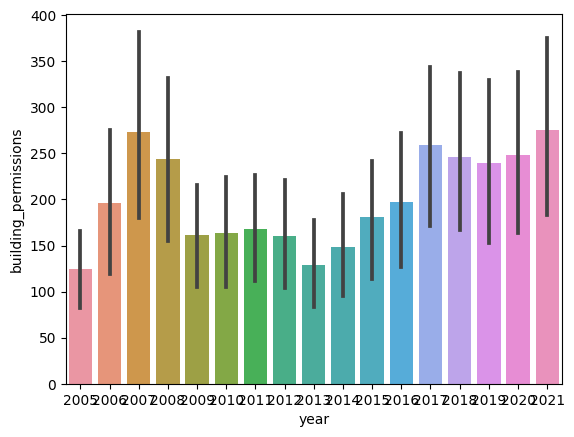

In [162]:
import seaborn as sns
sns.barplot(data, x=data['year'], y='building_permissions')

Pivot the table with regins as columns and years as indexes

In [163]:
data2 = data.pivot(index = 'year', columns='region', values='building_permissions')
data2 = data2.reset_index()
data2

region,year,DOLNOŚLĄSKIE,KUJAWSKO-POMORSKIE,LUBUSKIE,MAŁOPOLSKIE,OPOLSKIE,POMORSKIE,WARMIŃSKO-MAZURSKIE,WIELKOPOLSKIE,ZACHODNIOPOMORSKIE,ŚLĄSKIE
0,2005,226,102,37,153,11,245,87,127,149,110
1,2006,388,93,45,274,27,443,118,206,175,192
2,2007,605,171,83,342,55,500,157,295,310,213
3,2008,444,127,91,253,54,454,126,248,218,429
4,2009,331,123,62,178,14,255,92,223,168,173
5,2010,284,74,45,260,27,300,81,262,142,166
6,2011,300,116,61,229,18,292,85,237,166,170
7,2012,242,112,49,200,38,309,100,302,99,147
8,2013,259,109,62,126,16,250,54,187,90,138
9,2014,241,143,58,135,28,319,80,239,119,124


Save the data to file

<AxesSubplot: xlabel='year', ylabel='LUBUSKIE'>

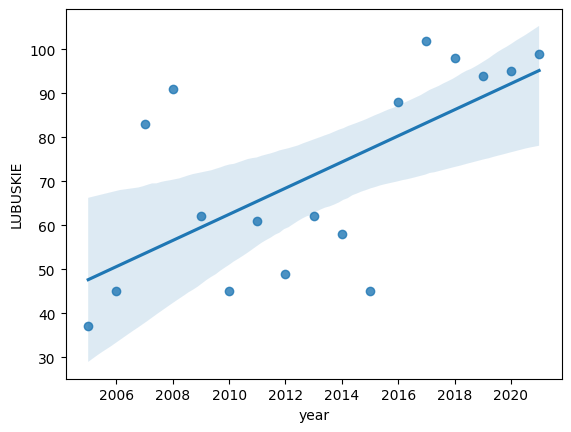

In [164]:

sns.regplot(data2, x=data2['year'], y=data2['LUBUSKIE'])

<AxesSubplot: xlabel='year', ylabel='LUBUSKIE'>

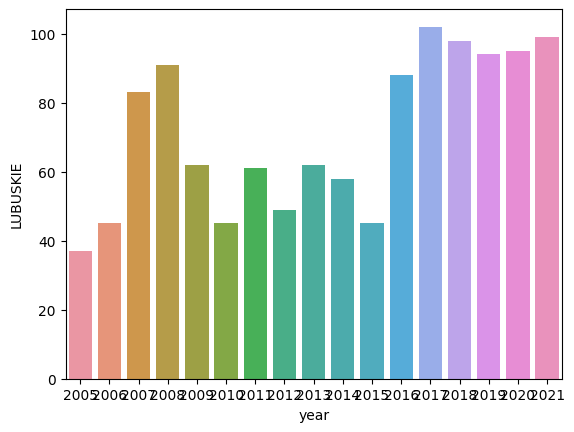

In [165]:
sns.barplot(data2, x=data2['year'], y=data2['LUBUSKIE'])

### lets add amount of buildings sold.

In [166]:
url2 = 'https://bdl.stat.gov.pl/api/v1/data/by-variable/633712?unit-level=2&lang=pl&format=json'


r = requests.get(url2)
r.status_code

200

In [167]:
data2 = r.json()['results']
data2 = pd.json_normalize(data2,'values','name')
data2 = data2.drop(axis=1, columns='attrId')
data2.rename(columns = {'val':'flats_sold', 'name':'region'}, inplace="True")

In [168]:
import numpy as np

#add new column filled with Nan
data['flats_sold'] = np.nan

#add values in propper data range
data.loc[data['year']>= 2010, 'flats_sold'] = data2['flats_sold'].values
#data2['flats_sold']

In [169]:
data

,year,building_permissions,region,flats_sold
0,2005,153,MAŁOPOLSKIE,NaN
1,2006,274,MAŁOPOLSKIE,NaN
2,2007,342,MAŁOPOLSKIE,NaN
3,2008,253,MAŁOPOLSKIE,NaN
4,2009,178,MAŁOPOLSKIE,NaN
...,...,...,...,...
165,2017,112,WARMIŃSKO-MAZURSKIE,549.0
166,2018,126,WARMIŃSKO-MAZURSKIE,495.0
167,2019,129,WARMIŃSKO-MAZURSKIE,716.0
168,2020,107,WARMIŃSKO-MAZURSKIE,682.0


In [170]:
%store data

Stored 'data' (DataFrame)


Next column will show data with peoples earnings

In [171]:
url = 'https://bdl.stat.gov.pl/api/v1/data/by-variable/64535?unit-level=2&lang=pl&format=json'

r = requests.get(url)
r.status_code

200

In [172]:
#data to dataframe plus some additional cosmetics
data3 = r.json()['results']
data3 = pd.json_normalize(data3,'values','name')
data3 = data3.drop(axis=1, columns='attrId')
data3.rename(columns = {'val':'mean_earnings', 'name':'region'}, inplace="True")


In [173]:
#add new column filled with Nan
data['mean_earnings'] = np.nan


In [174]:
#Added empty rows with 2022 year so I have the same number of forws in both databases. This will allow easy values assigment.
temp_df = data.loc[data['year'] == 2021].copy()
temp_df['year'] = 2022
temp_df['flats_sold'] = np.nan
temp_df['building_permissions'] = np.nan
data = pd.concat([data, temp_df])

In [175]:
#sorting values to make sure both dataframes are the same in terms of indexes.
data = data.sort_values(by=['region', 'year'], ignore_index=True)
data3 = data3.sort_values(by=['region', 'year'], ignore_index=True)

In [176]:
#add values in propper data range
data['mean_earnings'] = data3['mean_earnings']

In [177]:
data

,year,building_permissions,region,flats_sold,mean_earnings
0,2005,226.0,DOLNOŚLĄSKIE,NaN,2507.77
1,2006,388.0,DOLNOŚLĄSKIE,NaN,2604.41
2,2007,605.0,DOLNOŚLĄSKIE,NaN,2847.92
3,2008,444.0,DOLNOŚLĄSKIE,NaN,3120.42
4,2009,331.0,DOLNOŚLĄSKIE,NaN,3332.46
...,...,...,...,...,...
175,2018,322.0,ŚLĄSKIE,535.0,4811.88
176,2019,264.0,ŚLĄSKIE,825.0,5206.73
177,2020,309.0,ŚLĄSKIE,795.0,5549.14
178,2021,424.0,ŚLĄSKIE,1184.0,5908.69
